# Reporte semanal 2

## Día 1: lunes 19 de junio del 2017

Este día se utilizó para investigar acerca de las diferentes heurísticas que podían ser empleadas para resolver JSSP a través de recocido simulado. Los artículos encontrados fueron:

1. Kirkpatrick, S., Gelatt, C., & Vecchi, M. (1983). Optimization by Simulated Annealing. Science, 220(4598), 671-680. Retrieved from http://www.jstor.org/stable/1690046
2. B. Suman, & Kumar, P. (2006). A Survey of Simulated Annealing as a Tool for Single and Multiobjective Optimization. The Journal of the Operational Research Society, 57(10), 1143-1160. Retrieved from http://www.jstor.org/stable/4102365
3. Eglese R.W., SIMULATED ANNEALING. A TOOL FOR OPERATIONAL RESEARCH. (1990) European Journal of Operational Research, 46 (3), pages 271-281.
4. Ishibuchi H., Misaki S., & Tanaka H. (1995). Theory and Methodology Modified simulated annealing algorithms for the flow shop sequencing problem. European Journal of Operational Research, 81, 388-398.

De los cuales sólo el 4 tuvo relevancia. Esta publicación proporcionó las heurísticas 1 y 2 que serán detalladas más adelante. El resto del día se empleó en arreglar el primer reporte.

## Día 2: martes 20 de junio del 2017

Se inició el desarrollo de un módulo que implementara las primeras 2 heurísticas y que fuera lo suficientemente modular y flexible para agregarle sin esfuerzo las otras que se encontraran. Pensé que un patrón de diseño de tipo comando sería adecuado. Se estuvo desarrollando durante el día, pero al final cuando se trató de integrar me di cuenta que no funcionaba adecuadamente y que el programa actual no permite ese tipo de modificaciones tan fácilmente.

En lugar de hacer una mayor refactorización del código existente se optó por programar diferentes funciones dentro del programa original y hacer un switch que permitiera selecionar cual heuristica usar.

## Día 3: miércoles 21 de junio del 2017

Se siguieron buscando artículos académicos con posibles heurísticas para utilizar. Dichos articulos obtenidos fueron:

{:start="5"}
5. Tsuyoshi Satake, Katsumi Morikawa, Katsuhiko Takahashi, Nobuto Nakamura, Simulated annealing approach for minimizing the makespan of the general job-shop, International Journal of Production Economics, Volume 60, 1999, Pages 515-522, ISSN 0925-5273, http://dx.doi.org/10.1016/S0925-5273(98)00171-6. (http://www.sciencedirect.com/science/article/pii/S0925527398001716)
6. Jacek Błażewicz, Wolfgang Domschke, Erwin Pesch, The job shop scheduling problem: Conventional and new solution techniques, European Journal of Operational Research, Volume 93, Issue 1, 1996, Pages 1-33, ISSN 0377-2217, http://dx.doi.org/10.1016/0377-2217(95)00362-2. (http://www.sciencedirect.com/science/article/pii/0377221795003622)
7. Oliveira, Jose Fernando., Carnavilla, Maria Antonia. 2009. “Heuristic and Local Search”. FEUP.
8. Sierra Sánchez, María Rita, Varela Arias, & José Ramiro. (2008). A new admissible heuristic for the job shop scheduling problem with total flow time. Association for the Advancement of Artificial Intelligence. Obtained from: http://users.dsic.upv.es/~msalido/workshop-cp-icaps08/papers.html
9. Bülbül, Kerem and Kaminsky, Philip. (2013).A linear programming-based method for job shop scheduling. Journal of Scheduling, volume 16 number 2. pages 161-183. ISSN. 1099-1425. Obtained from: http://dx.doi.org/10.1007/s10951-012-0270-4
10. R. J. M. Vaessens and E. H. L. Aarts and J. K. Lenstra. (1996). Job Shop Scheduling by Local Search. INFORMS Journal on Computing, volume 8 number 3. pages 302-317. Obtained from: https://doi.org/10.1287/ijoc.8.3.302
11. Sierra, María R. and Varela, Ramiro. (2010). Pruning by dominance in best-first search for the job shop Scheduling problem with total flow time.  Journal of Intelligent Manufacturing. volume 21, number 1. Pages 111-119. ISSN. 1572-8145. Obtained from: http://dx.doi.org/10.1007/s10845-008-0167-4
12. D.H. Frost, Algorithms and heuristics for constraint satisfaction problems, Tech. rep., Ph.D. thesis, Information and Computer Science, University of California, Irvine (1997)
13. Matsuo, Hirofumi and Juck SUH, Chang and Sullivan, Robert S. (1989). A controlled search simulated annealing method for the single machine weighted tardiness problem. Annals of Operations Research. volume 21, number 1. pages 85-108. ISSN. 1572-9338. Obtained from: http://dx.doi.org/10.1007/BF02022094

De los cuales el 10 y el 13 dieron el resto de los algoritmos utilizados durante esta semana. En éste día se implementó solo uno de ellos.

## Día 4: jueves 22 de junio del 2017

Se implementaron el resto de las heurísticas. Se terminó el día desarrollando un script que ejecutara y recolectara todos los datos.

## Día 5: viernes 23 de junio del 2017

Se inició el análisis de los datos recolectados.

## Heurísticas propuestas

### 1. Best Move

This heuristic, obtained from [4], involves checking k neighbors randomly and finding the best one of them. If no one is better than the current solution, pick the least bad of them and return it. For the initial tests, k was of 3. Using this heuristic involves the simulated annealing algorithm to advance k iterations instead of one.

### 2. Best Move (greedy)

Same as above, but only returns a new solution if it is better than the current one.

### 3. First Move

This heuristic, obtained also from [4], involves generating a maximum of k neighbors randomly, comparing them to the current solution and returning a new solution if it was better. The main difference between this one and the best move heuristic is that it doesn't generate k solutions to get the best, it conforms with the first one which is better than the original. If no one is found, it returns the original solution. 

For the initial tests, k was of 3. Using this heuristic involves the simulated annealing algorithm to advance j iterations instead of one, where j is <= k (the number of comparisons made until a better one was found).

### 4. Sequential Search

This heuristic was inspired by a similar one found in [13], it involves generating neighbors in sequence by doing $n - 1$ exchanges, where n is the number of operations in a machine, to the original solution. As an example, if we have the operations $1,2,3,4,5$, the generated neighbors are:

$2,1,3,4,5$

$1,3,2,4,5$

$1,2,4,3,5$

$1,2,3,5,4$

if one if these is better than the original solution, return it.

### 5. Predecessor and Successor Exchange

This heuristic was taken from [10] and it involves getting a triple of operations on the same machine randomly, say $v, x, w$ in that order. We generate a new solution where those operations are now $w, x, v$ and return it if feasible. It is worth noting that if $v$ and $w$ belong to the same job, the exchange is not made.

### 6. Double Exchange

This heuristic was taken from [10] also. It follows the same logic as the one above, but takes 4 adjacent operations $w, x,y,z$ and exchanges $w$ with $x$ and $y$ with $z$, if two of the elements to be swapped belong to the same job, the change is not made, however this does not affect the other pair. 

## Análisis de Datos

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bokeh.plotting import figure, show
from bokeh.io import gridplot, output_notebook
from bokeh.charts import Bar
import bokeh.palettes

# load plotting library
output_notebook()

Loading BokehJS ...

### Best Move

Se empieza por la limpieza de datos para que cada corrida de cada programa puedea ser obtenida fácilmente.

In [4]:
# load data to dataframes
data_directory = "../../data/first_run/"

JSSP_best_dfs = []
number_of_files = 2
number_of_examples = 20

for i in range(number_of_files):
    JSSP_best_dfs.append([])
    file_df = pd.read_csv(data_directory + "JSSP_3_fN.csv".replace("N", str(i + 1)))
    column_names = file_df.columns.values.tolist()
    
    # remove trailing spances from column names
    column_names = [column_name.strip() for column_name in column_names]
    file_df.columns = column_names
    
    idx = [-1] + file_df[file_df['current_makespan'] == ' current_makespan'].index.tolist()
    
    for j in range(number_of_examples - 1):
        JSSP_best_dfs[i].append(file_df.loc[idx[j] + 1:idx[j + 1] - 2,:])
        
    JSSP_best_dfs[i].append(file_df.loc[idx[number_of_examples - 1] + 1:,:])

In [11]:
JSSP_best_dfs[0][0].head()

,best_makespan,current_makespan,current_temp,equal_count,first_op_moved,iter_number_in_temp,iter_per_temp,last_op_moved,longer_count,max_temperature,...,operation_duration,prob_acceptance,selected_machine,shorter_count,should_accept,switch_operation_1,temp_change_ratio,violates_constraint,worst_makespan,
1,2260,2260,10.0,0|0|0|,False|False|False|,0,100,False|False|False|,1|5|1|,10.0,...,16.0|28.0|82.0|,,9|9|8|,0|3|0|,True,4|12|13|,0.9,False|True|False|,2380,
2,2260,2459,10.0,0|0|0|,False|False|True|,3,100,False|False|False|,1|2|6|,10.0,...,88.0|58.0|1.0|,2.277927041205371e-09,8|14|14|,6|1|0|,False,13|5|0|,0.9,False|False|True|,2459,
3,2260,2260,10.0,0|0|0|,False|False|False|,6,100,False|False|False|,2|0|4|,10.0,...,87.0|90.0|45.0|,,14|12|13|,0|5|1|,True,11|9|13|,0.9,False|True|True|,2459,
4,2260,2260,10.0,0|0|0|,False|False|True|,9,100,False|False|False|,0|1|0|,10.0,...,68.0|30.0|75.0|,,7|7|4|,1|0|2|,True,8|3|0|,0.9,False|False|False|,2459,
5,2260,2323,10.0,0|0|1|,True|False|False|,12,100,False|False|False|,2|9|4|,10.0,...,1.0|3.0|8.0|,0.0018363047770289071,14|10|1|,0|0|0|,False,0|12|6|,0.9,False|True|True|,2459,


In [13]:
# for each dataframe remove the first row from data
for file_df in JSSP_best_dfs:
    for df in file_df:
        df.drop(df.index[0], inplace=True)
        
# for each dataframe, cast columns to appropriate types
numeric_columns = ['best_makespan', 'current_makespan', 'current_temp', 'iter_number_in_temp',
                  'iter_per_temp', 'max_temperature', 'min_temperature', 'moves', 'num_jobs',
                  'num_machines', 'num_operations', 'temp_change_ratio', 'worst_makespan', 'prob_acceptance']

string_columns = ['should_accept', 'move_direction']

multivariate_columns = ['equal_count','first_op_moved', 'last_op_moved', 'longer_count', 
                        'operation_duration', 'selected_machine', 'shorter_count', 'switch_operation_1',
                        'violates_constraint']

for file in range(number_of_files):
    for example in range(number_of_examples):
        for column in numeric_columns:
            JSSP_best_dfs[file][example].loc[:, column] = \
                    JSSP_best_dfs[file][example].loc[:,column].apply(pd.to_numeric, errors='coerce')
                
        for column in string_columns:
            JSSP_best_dfs[file][example].loc[:, column] = \
                    JSSP_best_dfs[file][example].loc[:,column].astype(str)
                
# the dataframe columns alongside their type are shown below
JSSP_best_dfs[0][0].dtypes

best_makespan            int64
current_makespan         int64
current_temp           float64
equal_count             object
first_op_moved          object
iter_number_in_temp      int64
iter_per_temp            int64
last_op_moved           object
longer_count            object
max_temperature        float64
min_temperature        float64
move_direction          object
moves                  float64
num_jobs                 int64
num_machines             int64
num_operations         float64
operation_duration      object
prob_acceptance        float64
selected_machine        object
shorter_count           object
should_accept           object
switch_operation_1      object
temp_change_ratio      float64
violates_constraint     object
worst_makespan           int64
                        object
dtype: object

In [16]:
plots = []
for file in range(number_of_files):
    p = figure(plot_width=4000, plot_height=400)
    ys = []
    xs = []

    for example in range(10):
        ys.append(JSSP_best_dfs[file][example].loc[:, "best_makespan"].tolist())
        xs.append(list(range(JSSP_best_dfs[file][example].shape[0])))
    
    p.multi_line(xs, ys, color=bokeh.palettes.d3['Category10'][10], line_width=2)
    
    p.xaxis.axis_label = "Iteration"
    p.xaxis.axis_label_text_color = "#aa6666"
    p.yaxis.axis_label = "Best Makespan"
    p.yaxis.axis_label_text_color = "#aa6666"
    
    plots.append([p])

p = gridplot(plots, toolbar_location="left", title="Best Makespan per Iteration Comparison")
show(p)

In [19]:
plots = []
for file in range(number_of_files):
    p = figure(plot_width=4000, plot_height=400)
    ys = []
    xs = []

    for example in range(5):
        ys.append(JSSP_best_dfs[file][example].loc[:, "current_makespan"].tolist())
        xs.append(list(range(JSSP_best_dfs[file][example].shape[0])))

    p.multi_line(xs, ys, color=bokeh.palettes.d3['Category10'][5], line_width=2)
    
    p.xaxis.axis_label = "Iteration"
    p.xaxis.axis_label_text_color = "#aa6666"
    p.yaxis.axis_label = "Current Makespan"
    p.yaxis.axis_label_text_color = "#aa6666"
    
    plots.append([p])

p = gridplot(plots, toolbar_location="left", title="Current Makespan per Iteration Comparison")
show(p)

In [26]:
plots = []
for file in range(number_of_files):
    p = figure(plot_width=4000, plot_height=400)
    ys = []
    xs = []
    
    example = 0
    ys.append(JSSP_best_dfs[file][example].loc[:, "current_makespan"].tolist())
    ys.append(JSSP_best_dfs[file][example].loc[:, "best_makespan"].tolist())
    xs.append(list(range(JSSP_best_dfs[file][example].shape[0])))
    xs.append(list(range(JSSP_best_dfs[file][example].shape[0])))

    p.multi_line(xs, ys, color=['red', 'blue'], line_width=2)
    
    p.xaxis.axis_label = "Iteration"
    p.xaxis.axis_label_text_color = "#aa6666"
    p.yaxis.axis_label = "Makespan"
    p.yaxis.axis_label_text_color = "#aa6666"
    
    plots.append([p])

p = gridplot(plots, toolbar_location="left", title="Current Makespan alongside Best Makespan per Iteration Comparison")
show(p)

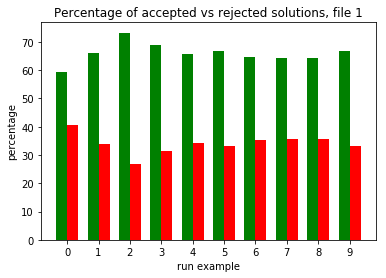

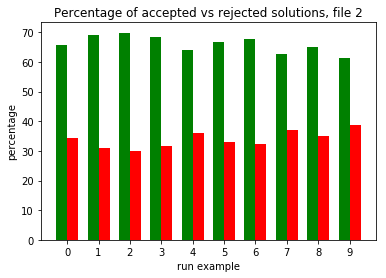

In [27]:
# the should accept ratios
for file in range(number_of_files):
    positives = []
    negatives = []

    for example in range(10):
        df = JSSP_best_dfs[file][example]
        
        num_positives = df[df['should_accept'] == " True"].shape[0]
        num_negatives = df[df['should_accept'] == " False"].shape[0]
        total = num_positives + num_negatives
        positives.append(num_positives * 100 / total)
        negatives.append(num_negatives * 100 / total)
        
    N = 10
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, positives, width, color='green')
    rects2 = ax.bar(ind + width, negatives, width, color='red')

    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels([str(value) for value in range(N)])
    
    plt.title('Percentage of accepted vs rejected solutions, file {0}'.format(str(file + 1)))
    plt.ylabel('percentage')
    plt.xlabel('run example')
    plt.show()

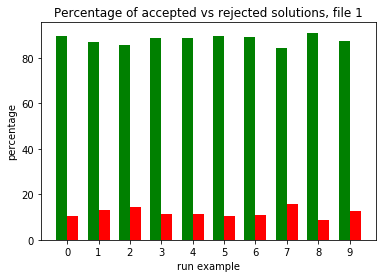

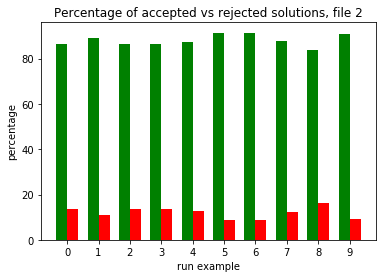

In [43]:
# times a valid solution was accepted and it did not violate a constraint
for file in range(number_of_files):
    positives = []
    negatives = []

    for example in range(10):
        df = JSSP_best_dfs[file][example]
        df = df.loc[:, ["should_accept", "violates_constraint"]]
    
        num_positives = df[df['should_accept'] == " True"]
        num_neg = num_positives[num_positives['violates_constraint'] == " True|True|True|"]
        num_negatives = num_neg.shape[0]
        num_positives = df.shape[0] - num_negatives

        total = num_positives + num_negatives
        positives.append(num_positives * 100 / total)
        negatives.append(num_negatives * 100 / total)
        
    N = 10
    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, positives, width, color='green')
    rects2 = ax.bar(ind + width, negatives, width, color='red')

    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels([str(value) for value in range(N)])
    
    plt.title('Percentage of accepted vs rejected solutions, file {0}'.format(str(file + 1)))
    plt.ylabel('percentage')
    plt.xlabel('run example')
    plt.show()

In [31]:
df = JSSP_best_dfs[0][0].head()

In [40]:
df.loc[:, "violates_constraint"]

2469      False|False|True|
2470      True|False|False|
2471       True|False|True|
2472        True|True|True|
2473     False|False|False|
2474        True|True|True|
2475     False|False|False|
2476      False|False|True|
2477       True|False|True|
2478       True|False|True|
2479     False|False|False|
2480       True|False|True|
2481       True|True|False|
2482     False|False|False|
2483      False|True|False|
2484      False|True|False|
2485      False|False|True|
2486      False|True|False|
2487      True|False|False|
2488      False|True|False|
2489      False|False|True|
2490     False|False|False|
2491      False|False|True|
2492      False|True|False|
2493      False|False|True|
2494      True|False|False|
2495     False|False|False|
2496      True|False|False|
2497       True|False|True|
2498      False|False|True|
               ...         
2708       True|True|False|
2709     False|False|False|
2710       False|True|True|
2711     False|False|False|
2712       False|Tru